In [1]:
!pip install tensorflow matplotlib

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize pixel values to be between 0 and 1
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)  # One-hot encode labels

In [3]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


1563/1563 [==============================] - 30s 16ms/step - loss: 1.5385 - accuracy: 0.4384 - val_loss: 1.3058 - val_accuracy: 0.5397
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1703 - accuracy: 0.5845 - val_loss: 1.0780 - val_accuracy: 0.6197
Epoch 3/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.0169 - accuracy: 0.6403 - val_loss: 1.0319 - val_accuracy: 0.6314
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9155 - accuracy: 0.6771 - val_loss: 0.9599 - val_accuracy: 0.6694
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8492 - accuracy: 0.7020 - val_loss: 0.9101 - val_accuracy: 0.6860
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7878 - accuracy: 0.7224 - val_loss: 0.9511 - val_accuracy: 0.6668
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7386 - accuracy: 0.7384 - val_loss: 0.8808

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 2s 5ms/step - loss: 0.8781 - accuracy: 0.6983
Test accuracy: 0.6983000040054321


In [8]:
# Save the model
model.save('cifar10_model.h5')

d:\New folder (2)\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


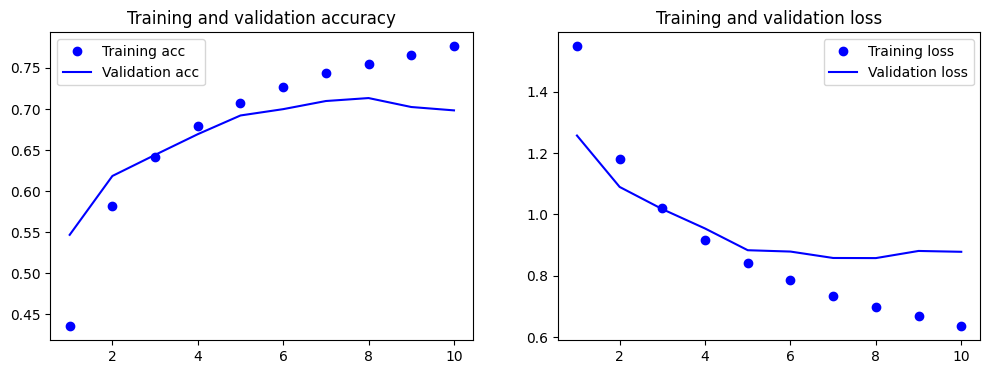

In [9]:
# Plot training history
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_training_history(history)